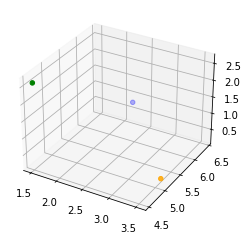

(3, 3)
(3, 2)


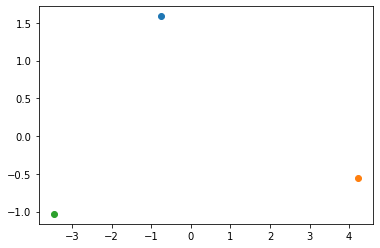

ratio [0.8865363 0.1134637]


In [5]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from mpl_toolkits import mplot3d

X = np.array([[1.5,2.21,3.53],[4.54,6.42,5.12],[2.6,.8,.220]])

fig = plt.figure()
ax = plt.axes(projection="3d")
colors = ['green','blue','orange']

ax.scatter3D(X[0], X[1], X[2], c=colors, cmap='hsv')

plt.show()

print(X.shape)

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

print(X2D.shape)

fig = plt.figure()



ax.set_axis_off()
for x in X2D:
    plt.plot(x[0], x[1],'o')
plt.show()

print("ratio", pca.explained_variance_ratio_)

In [8]:

x = np.array([[1.5,2.21,3.53,5,0],[4.54,6.42,5.12,5,0],[2.6,.8,.220,4,-4]])


pca = PCA()

pca.fit(x)

cumsum = np.cumsum(pca.explained_variance_ratio_)

d = np.argmax(cumsum >=0.95) + 1

print (d)

2


X shape  (506, 13)
PCA X shape  (506, 3)
ratio [0.47129606 0.11025193 0.0955859 ]


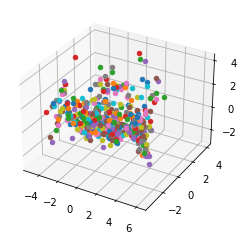

No PCA 0.6846868305630175
PCA 0.5920929013124586


In [13]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d

bos = load_boston()

boston = pd.DataFrame(bos.data)

boston.columns = bos.feature_names

x = StandardScaler().fit_transform(boston)

y = bos.target

print('X shape ', x.shape)

pca = PCA(n_components=3)

x_reshaped = pca.fit_transform(x)

print('PCA X shape ', x_reshaped.shape)

print('ratio', pca.explained_variance_ratio_)


fig = plt.figure()
ax = plt.axes(projection="3d")

for point in x_reshaped:
    ax.scatter3D(point[0], point[1], point[2], marker='o', cmap='hsv')
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=32)

model = LinearRegression()

model.fit(x_train, y_train)

print("No PCA", model.score(x_test, y_test))


x_train, x_test, y_train, y_test = train_test_split(x_reshaped, y, test_size=.2, random_state=32)

model = LinearRegression()

model.fit(x_train, y_train)

print("PCA",model.score(x_test, y_test))

In [19]:
pca = PCA()

pca.fit(x)

cumsum = np.cumsum(pca.explained_variance_ratio_)

#find min dimensionality to preserve 95% variance

d = np.argmax(cumsum >= .95) + 1

print("min dimension", d)


min dimension 9


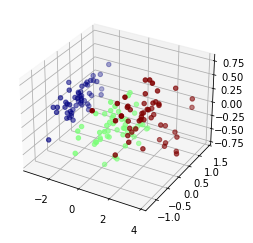

ratio [0.92461872 0.05306648 0.01710261]


In [21]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt


from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d

iris = load_iris()

X = iris.data
y = iris.target

pca = PCA(n_components=3)

x_reshaped = pca.fit_transform(X)
fig = plt.figure()
ax = plt.axes(projection="3d")


ax.scatter3D(x_reshaped[:,0],x_reshaped[:,1], x_reshaped[:,2], marker='o', c=y, cmap='jet')
plt.show()

print('ratio', pca.explained_variance_ratio_)